In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn 
import statsmodels.api as sm
from sklearn.cluster import k_means
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
# Reading the previously created modified files
train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')

In [3]:
train.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,label
0,1,1,0,0,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,1
1,1,1,0,0,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,1
2,1,1,0,0,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,1
3,1,1,0,0,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,1
4,1,1,1,1,0,0,1,1,1,1,...,0,1,1,1,1,1,0,0,1,4
5,1,1,0,0,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,1
6,1,1,0,0,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,1
7,1,0,0,0,0,0,1,0,1,1,...,0,1,1,0,0,0,0,1,1,3
8,1,0,0,0,0,0,1,0,1,1,...,0,1,1,0,0,0,0,1,1,3
9,1,1,0,0,0,0,1,1,0,0,...,0,1,1,1,0,0,0,1,1,6


In [4]:
# Seprating into x and y
y_train=train['label']
x_train=train.drop('label',axis=1)

In [5]:
# Normalizing the values
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

In [6]:
# Computive the cumulative for various features
pca=PCA(random_state=42)
pca.fit_transform(x_train_scaled,y_train)
cumulative=np.cumsum(pca.explained_variance_ratio_)

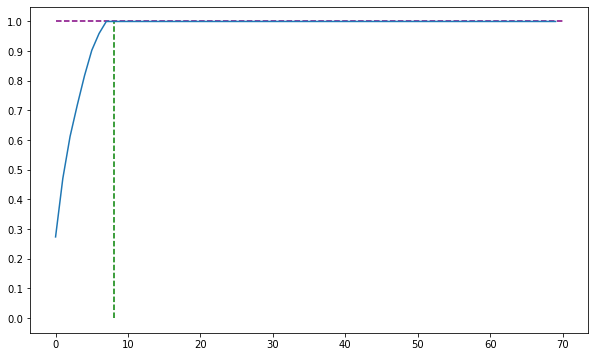

In [7]:
# Visualizing the relevant number of features
fig = plt.figure(figsize=[10,6])
plt.vlines(x=8, ymax=1, ymin=0, colors="g", linestyles="--")
plt.hlines(y=1.0, xmax=70, xmin=0, colors="purple", linestyles="--")
sns.lineplot(y=cumulative,x=range(len(cumulative)))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [8]:
# Viewing the cumulative values. Based on this, eight features are chosen.
print(cumulative)

[0.27344443 0.47032346 0.61198887 0.71843958 0.81754225 0.90285188
 0.95929368 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [9]:
# Applying Incremental PCA with 8 features
pca=IncrementalPCA(n_components=8)
x_train_pca=pca.fit_transform(x_train_scaled)

In [10]:
x_train_final=pd.DataFrame(x_train_pca)

In [11]:
x_train_final.head(10)

,0,1,2,3,4,5,6,7
0,7.658290,-3.766434,5.216023,1.748188,1.088667,-1.469306,0.795582,0.056167
1,7.658290,-3.766434,5.216023,1.748188,1.088667,-1.469306,0.795582,0.056167
2,7.658290,-3.766434,5.216023,1.748188,1.088667,-1.469306,0.795582,0.056167
3,7.658290,-3.766434,5.216023,1.748188,1.088667,-1.469306,0.795582,0.056167
4,0.850219,9.752293,2.290113,-0.042695,-0.338324,-0.450463,0.501251,-0.703134
5,7.658290,-3.766434,5.216023,1.748188,1.088667,-1.469306,0.795582,0.056167
6,7.658290,-3.766434,5.216023,1.748188,1.088667,-1.469306,0.795582,0.056167
7,-1.619377,0.326727,-3.080515,0.032008,0.929218,-3.238282,1.755047,3.464938
8,-1.619377,0.326727,-3.080515,0.032008,0.929218,-3.238282,1.755047,3.464938
9,-4.294160,-1.544674,4.352975,-3.714565,-1.742363,2.298675,-1.513291,1.815703


In [12]:
# Using a 3-fold approach
folds=KFold(n_splits=3,shuffle=True,random_state=42)
params = {"C": [1, 5, 10, 100]}

# Using a support vector model
model = SVC()

# Grid search scheme is used with 3 folds, using a Support Vector Model to determine best parameter
# Train Accuracy is used as the measurement metric
model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= 'accuracy', 
                        cv = folds, verbose = 1, return_train_score=True)  

In [13]:
# Fitting the model to the data
model_cv.fit(x_train_final, y_train)  

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(), param_grid={'C': [1, 5, 10, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [14]:
# Results. Accuracy over 99.8% is observed
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.011257,0.002058,0.003989,0.000814,1,{'C': 1},0.997447,0.999362,1.0,0.998936,0.001085,1,0.999681,0.998723,0.998405,0.998936,0.000542
1,0.007314,0.001245,0.002992,0.000814,5,{'C': 5},0.997447,0.999362,1.0,0.998936,0.001085,1,0.999681,0.998723,0.998405,0.998936,0.000542
2,0.007659,0.000448,0.003325,0.001244,10,{'C': 10},0.997447,0.999362,1.0,0.998936,0.001085,1,0.999681,0.998723,0.998405,0.998936,0.000542
3,0.006977,0.000808,0.002978,0.000024,100,{'C': 100},0.997447,0.999362,1.0,0.998936,0.001085,1,0.999681,0.998723,0.998405,0.998936,0.000542


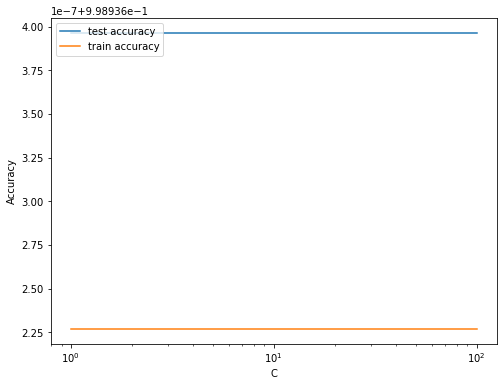

In [15]:
# plot of C versus train and test scores, to visualize the best C
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [16]:
# Best C value and accuracy
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9989363965113806 at C = 1


In [17]:
# Tranforming the test data, and making predictions using the model
x_test_scaled=scaler.transform(test.iloc[:,0:70])
x_test_pca=pca.transform(x_test_scaled)
x_test_final=pd.DataFrame(x_test_pca)
test_predict = model_cv.predict(x_test_final)

In [18]:
# Converting the predictions into the required format
solution=pd.DataFrame()
solution['Expected']=test_predict

In [19]:
solution.head()

,Expected
0,6
1,6
2,3
3,7
4,2


In [20]:
# Generating the result for each image file, by combining the predictions for the 5 digits
i=0
predictions = pd.DataFrame(columns=["File","Capcha"])
while(i<solution.shape[0]):
    predictions.loc[int(i/5)] = [test.iloc[i,70]] + [str(solution.Expected[i])+str(solution.Expected[i+1])+
                                str(solution.Expected[i+2])+str(solution.Expected[i+3])+str(solution.Expected[i+4])]
    i=i+5

In [21]:
predictions.head(10)

,File,Capcha
0,0.png,66372
1,1.png,21559
2,10.png,45761
3,100.png,57172
4,1000.png,18773
5,1001.png,19634
6,1002.png,72444
7,1003.png,35177
8,1004.png,61961
9,1005.png,59742


In [22]:
# Saving the predictions
predictions.to_csv('Predictions.csv', index=False)